## Camera Footprint Calulator
In this Jupyter notebook, we can compute and plot the footprint of a camera or other field of view (FOV) related sensor. You will need to edit the Inputs cell below to compute metrics.


In [1]:
# Modules
import math
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#INPUTS
cam_name = "ACTI A31"
units= "feet"
horz_fov_deg = 106.9
vert_fov_deg = 79.9
inst_height = 9.0
pitch_deg = 20
roll_deg = 0

In [2]:
def footprint(horzFOV, vertFOV, pitch, roll, instrumentH):
    """Compute a footprint given FOV, pitch, and roll
    
    Parameters
        horzFOV : flt
            Horizontal field of view of the sensor in degrees
        vertFOV : flt
            Vertical field of view of the sensor in degrees
        pitch : flt
            Pitch of sensor in degrees (rotation about x-axis)
        roll : flt
            Roll of sensor in degrees (rotation about y-axis)
        [TODO: Add] yaw : flt
            Yaw of sensor in degrees (rotation about z-axis)
        instrumentH : flt
            Height of sensor above datum (presumed 0). Units arbitrary
    
    Returns
        origin
            A tuple with the x,y,z coordinate of the principle point of the 
            footprint
        footprint_pos
            A standard position tuple relative to upper left of the footprint
            in the form: (x, y, width, height).
    """
    top = instrumentH*np.tan(np.radians(pitch+1/2*vertFOV))
    bottom = instrumentH*np.tan(np.radians(pitch-1/2*vertFOV))
    left = instrumentH*np.tan(np.radians(roll+1/2*horzFOV))
    right = instrumentH*np.tan(np.radians(roll-1/2*horzFOV))
    height = top - bottom
    width = left - right
    origin = (np.tan(np.radians(roll))*instrumentH, np.tan(np.radians(pitch))*instrumentH,0)
    #xy_coord = (origin[0] - (width/2), origin[1] - (height/2), 0)
    footprint_pos = (origin[0]-(width/2), origin[1]-(height/2), width, height)
    return origin, footprint_pos

# Compute footprint with no pitch and roll
o1, fp1 = footprint(horz_fov_deg,vert_fov_deg,0,0,inst_height)

# Compute footprint accounting for pitch and roll
o2, fp2 = footprint(horz_fov_deg,vert_fov_deg,pitch_deg,roll_deg,inst_height)

## Plots

<IPython.core.display.Javascript object>


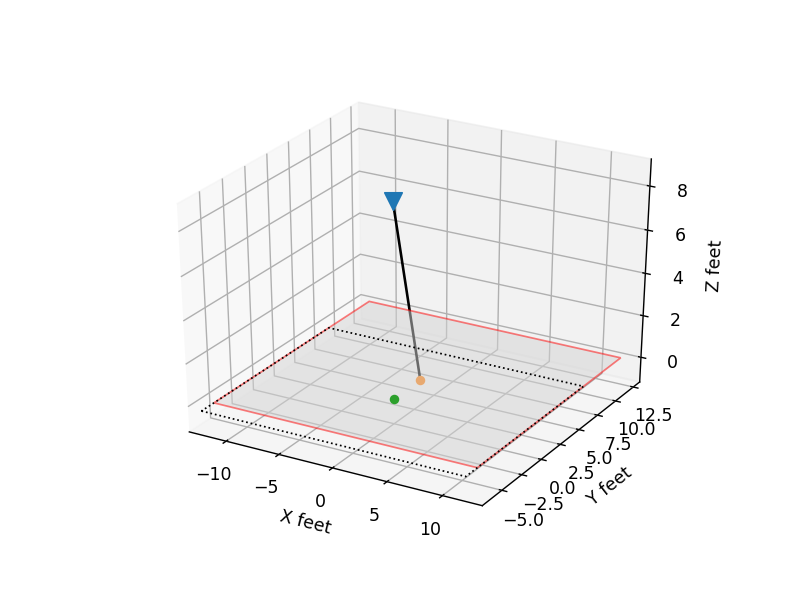

In [3]:

#def plot_footprint(ax, origin, footprint, **plotkwargs):
    
ax = plt.axes(projection='3d')

rect_o = patches.Rectangle((fp1[0],fp1[1]),fp1[2],fp1[3],linewidth=1,edgecolor='black',facecolor='none',alpha=1, linestyle=":")
rect_fp = patches.Rectangle((fp2[0],fp2[1]),fp2[2],fp2[3],linewidth=1,edgecolor='r',facecolor='lightgrey',alpha=0.5)
ax.add_patch(rect_o)
ax.add_patch(rect_fp)
art3d.pathpatch_2d_to_3d(rect_o, z=0, zdir="z")
art3d.pathpatch_2d_to_3d(rect_fp, z=0, zdir="z")


ax.scatter(0, 0, inst_height, marker="v", s=100)
ax.scatter(o2[0],o2[1],o2[2])
ax.scatter(0,0,0)
ax.plot3D((o2[0],0),(o2[1],0),(o2[2],inst_height), 'black')

ax.set_xlabel('X '+ units)
ax.set_ylabel('Y '+ units)
ax.set_zlabel('Z '+ units)
ax.set_xlim([np.floor(fp2[0]), np.ceil(fp2[0]+fp2[2])])
ax.set_ylim([np.floor(fp2[1]), np.ceil(fp2[1]+fp2[3])])
ax.set_zlim(-1, np.ceil(inst_height))
ax.set_aspect('equal')
plt.show()


In [4]:
print('Pitch:      {:.2f} degrees'.format(pitch_deg))
print('Roll:       {:.2f} degrees'.format(roll_deg))
print('Width:      {:.2f} {}'.format(fp2[2],units))
print('Height:     {:.2f} {}'.format(fp2[3],units))
print('Prinicple point is')
print('            {:.2f} {} in front of camera, and'.format(o2[0],units))
print('            {:.2f} {} to the right of camera'.format(o2[1],units))

Pitch:      20.00 degrees
Roll:       0.00 degrees
Width:      24.28 feet
Height:     18.82 feet
Prinicple point is
            0.00 feet in front of camera, and
            3.28 feet to the right of camera
